<a href="https://colab.research.google.com/github/ahmadhafis/PCVK_Genap_2022/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

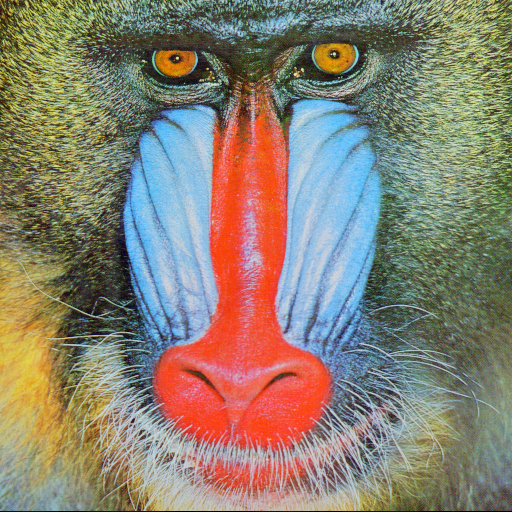

<BarContainer object of 256 artists>

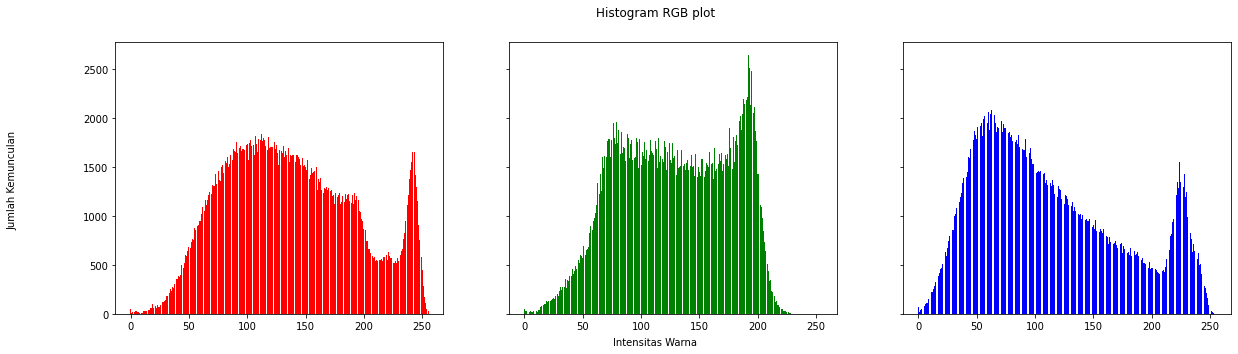

In [ ]:
# 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart : (Gunakan gambar mandrill.tiff)
img = cv.imread('/content/drive/MyDrive/Asset/Images/mandrill.tiff')
height, width, depth = np.shape(img)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0, height):
  for x in range(0, width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

cv2_imshow(img)

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

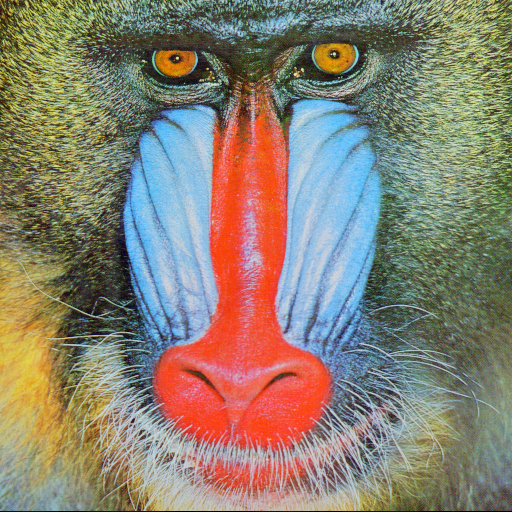

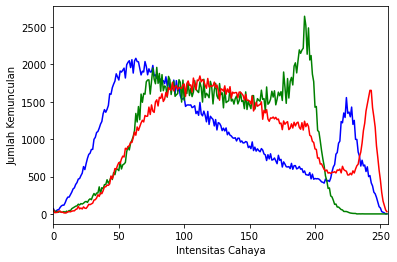

In [7]:
# 4. buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.

colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors) :
  histogram, bin_edges =np.histogram(img[:,:,channel_id], bins=256, range=(0,256))
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Cahaya")
plt.ylabel("Jumlah Kemunculan")

cv2_imshow(img)
plt.show()

Hasilnya sama dengan hasil di nomor 3

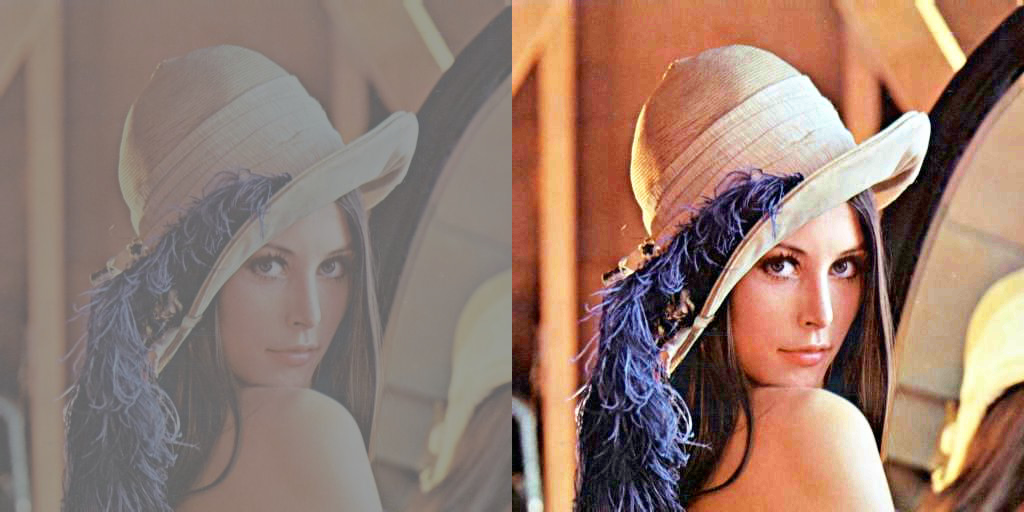

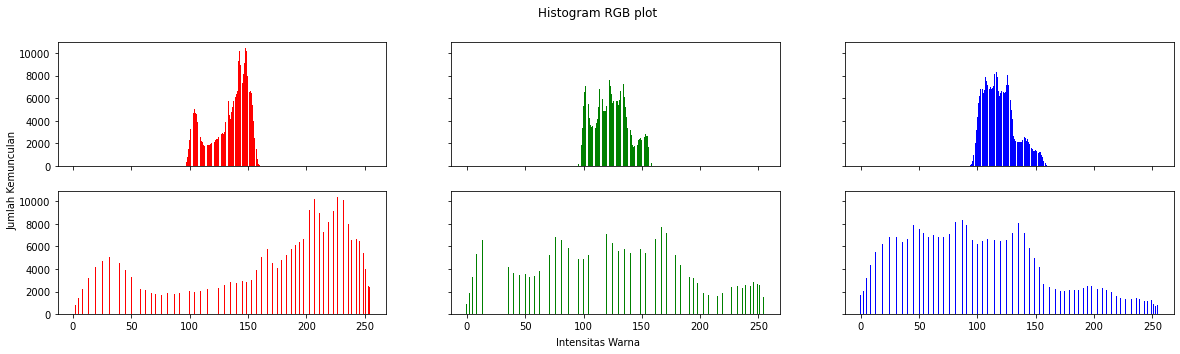

In [6]:
# 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
#    flowchart

img2 = cv.imread('/content/drive/MyDrive/Asset/Images/lena_lc.jpg')
def histog(img2):
  height, width, depth = np.shape(img2) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img2[y][x][0]] += 1 
      ax[1][img2[y][x][1]] += 1
      ax[2][img2[y][x][2]] += 1 
  return ax

real_histogram = histog(img2)

img_array = np.asarray(img2)
histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img3 = eq_img_array

equal_histo = histog(img3)

final_frame = cv.hconcat((img2, img3)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, real_histogram[2], color='red') 
  axs[0,1].bar(names, real_histogram[1], color='green') 
  axs[0,2].bar(names, real_histogram[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, real_histogram[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

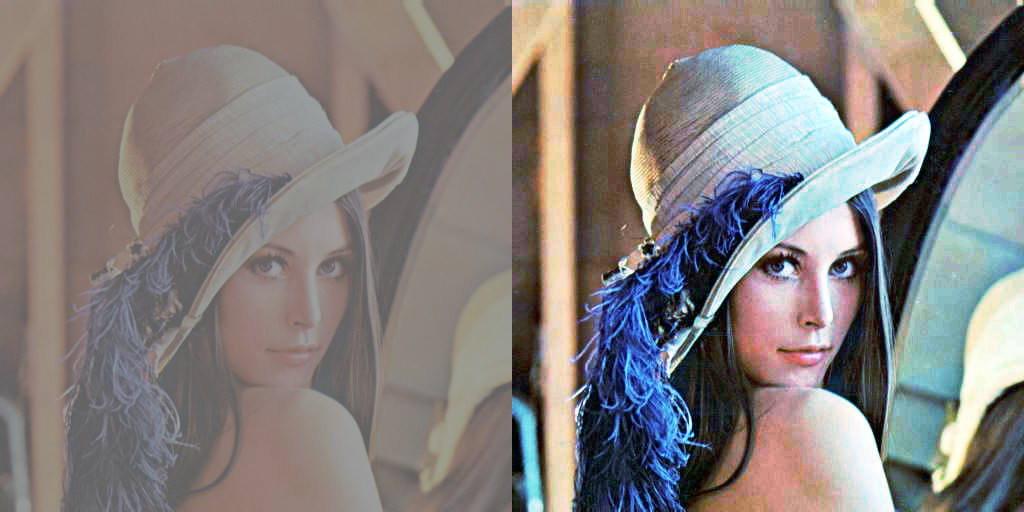

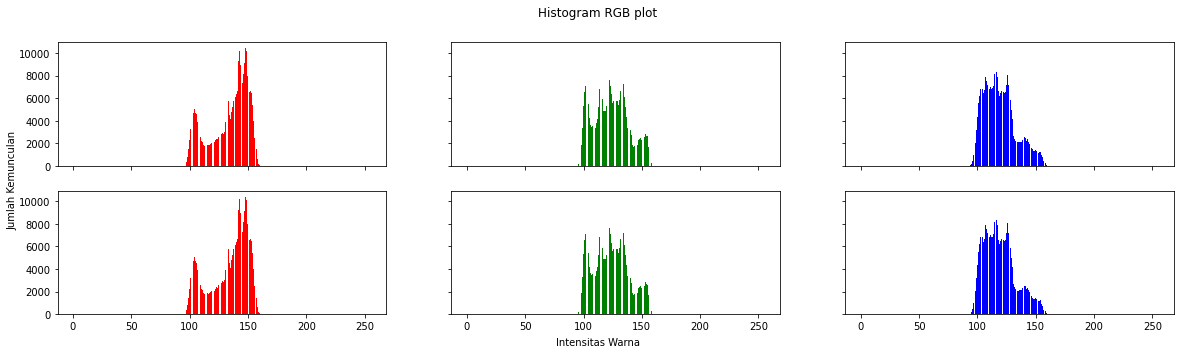

In [8]:
# 6. buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”.
channels = cv.split(img2)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img2, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_histogram[2], color='red')
  axs[0,1].bar(names, real_histogram[1], color='green')
  axs[0,2].bar(names, real_histogram[0], color='blue')
  axs[1,0].bar(names, real_histogram[2], color='red')
  axs[1,1].bar(names, real_histogram[1], color='green')
  axs[1,2].bar(names, real_histogram[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_histogram[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')



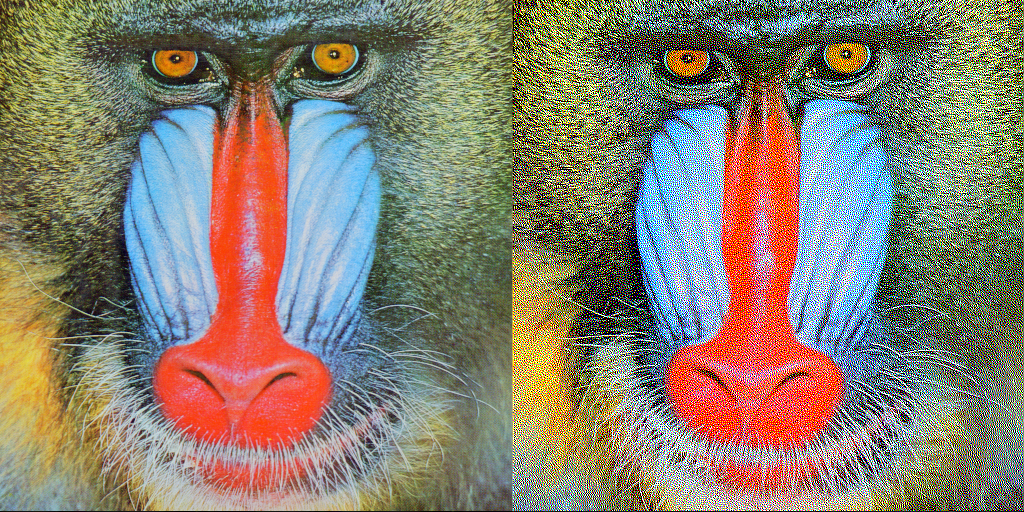

In [21]:
# 7. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart

import cv2
import numpy as np


def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(inMat, samplingF):
    # Source : https://study.marearts.com/2018/10/dithering-python-opencv-source-code.html
    #input is supposed as color
    # grab the image dimensions
    h = inMat.shape[0]
    w = inMat.shape[1]
     
    
    for y in range(0, h-1):
        for x in range(1, w-1):
            # threshold the pixel
            old_b = inMat[y, x, 0]
            old_g = inMat[y, x, 1]
            old_r = inMat[y, x, 2]
            
            new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
            new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
            new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)


            inMat[y, x, 0] = new_b
            inMat[y, x, 1] = new_g
            inMat[y, x, 2] = new_r




            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r


            inMat[y, x+1, 0] = minmax(inMat[y, x+1, 0] + quant_error_b * 7 / 16.0)
            inMat[y, x+1, 1] = minmax(inMat[y, x+1, 1] + quant_error_g * 7 / 16.0)
            inMat[y, x+1, 2] = minmax(inMat[y, x+1, 2] + quant_error_r * 7 / 16.0)
            
            inMat[y+1, x-1, 0] = minmax(inMat[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            inMat[y+1, x-1, 1] = minmax(inMat[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            inMat[y+1, x-1, 2] = minmax(inMat[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            inMat[y+1, x, 0] = minmax(inMat[y+1, x, 0] + quant_error_b * 5 / 16.0)
            inMat[y+1, x, 1] = minmax(inMat[y+1, x, 1] + quant_error_g * 5 / 16.0)
            inMat[y+1, x, 2] = minmax(inMat[y+1, x, 2] + quant_error_r * 5 / 16.0)


            inMat[y+1, x+1, 0] = minmax(inMat[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            inMat[y+1, x+1, 1] = minmax(inMat[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            inMat[y+1, x+1, 2] = minmax(inMat[y+1, x+1, 2] + quant_error_r * 1 / 16.0)


    # return the thresholded image
    return inMat




#read image
inMat = cv2.imread('/content/drive/MyDrive/Asset/Images/mandrill.tiff') #mandrill.tiff')
#color ditering
outMat_color = dithering_color(inMat.copy(), 1)
cv2.imwrite('/content/drive/MyDrive/Asset/mandrill21.tiff', outMat_color)

hasil_image = cv2.imread('/content/drive/MyDrive/Asset/mandrill21.tiff')
final_frame = cv.hconcat((img, hasil_image))
cv2_imshow(final_frame)